In [2]:
%matplotlib inline

# 592B, Class 9.2 (10/31). Filtering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile 
import scipy.signal as signal
from scipy import fftpack

from ipywidgets import interactive
from IPython.display import Audio, display

## Filters

The code below comes from this tutorial [signal filtering demo](https://www.swharden.com/wp/2009-01-21-signal-filtering-with-python/), lightly edited to remove some code that throws errors for me.

The key point to get from this is to look at how filtering works from a frequency domain perspective, and to also see how that is related to what is going on in the time domain.

In [3]:
xs=np.arange(1,100,.01) #generate Xs (0.00,0.01,0.02,0.03,...,100.0)
signal = sin1=np.sin(xs*.3) #(A)
sin1=np.sin(xs) # (B) sin1
sin2=np.sin(xs*2.33)*.333 # (B) sin2
sin3=np.sin(xs*2.77)*.777 # (B) sin3
noise=sin1+sin2+sin3 # (C)
static = (np.random.random_sample((len(xs)))-.5)*.2 # (D)
sigstat=static+signal # (E)
rawsignal=sigstat+noise # (F)
fft=fftpack.fft(rawsignal) # (G) and (H)
bp=fft[:]
for i in range(len(bp)): # (H-red)
    if i>=10:bp[i]=0
ibp=fftpack.ifft(bp) # (I), (J), (K) and (L)

In [4]:
import pylab # for plotting 

Here's a few of the plots, so we can look at the time domain vs. the frequency domain.

[0, 60, None, None]

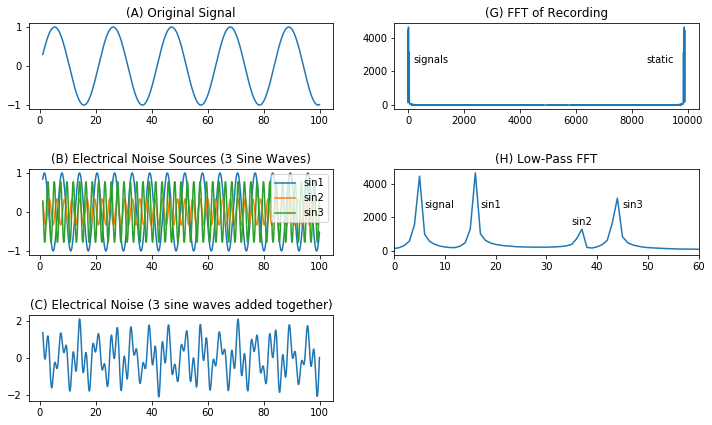

In [5]:
h,w=6,2
pylab.figure(figsize=(12,15))
pylab.subplots_adjust(hspace=.7)

pylab.subplot(h,w,1);pylab.title("(A) Original Signal")
pylab.plot(xs,signal)

pylab.subplot(h,w,3);pylab.title("(B) Electrical Noise Sources (3 Sine Waves)")
pylab.plot(xs,sin1,label="sin1")
pylab.plot(xs,sin2,label="sin2")
pylab.plot(xs,sin3,label="sin3")
pylab.legend()

pylab.subplot(h,w,5);pylab.title("(C) Electrical Noise (3 sine waves added together)")
pylab.plot(xs,noise)

fft=fftpack.fft(rawsignal)
pylab.subplot(h,w,2);pylab.title("(G) FFT of Recording")
pylab.plot(abs(fft))
pylab.text(200,3000,"signals",verticalalignment='top')
pylab.text(9500,3000,"static",verticalalignment='top',
            horizontalalignment='right')

pylab.subplot(h,w,4);pylab.title("(H) Low-Pass FFT")
pylab.plot(abs(fft))
pylab.text(17,3000,"sin1",verticalalignment='top',horizontalalignment='left')
pylab.text(37,2000,"sin2",verticalalignment='top',horizontalalignment='center')
pylab.text(45,3000,"sin3",verticalalignment='top',horizontalalignment='left')
pylab.text(6,3000,"signal",verticalalignment='top',horizontalalignment='left')
#pylab.axvspan(10,10000,fc='r',alpha='.5')
#pylab.axvspan(10,10000,alpha='.5')
pylab.axis([0,60,None,None])

Now here are all of the plots:

/Users/oxbow/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


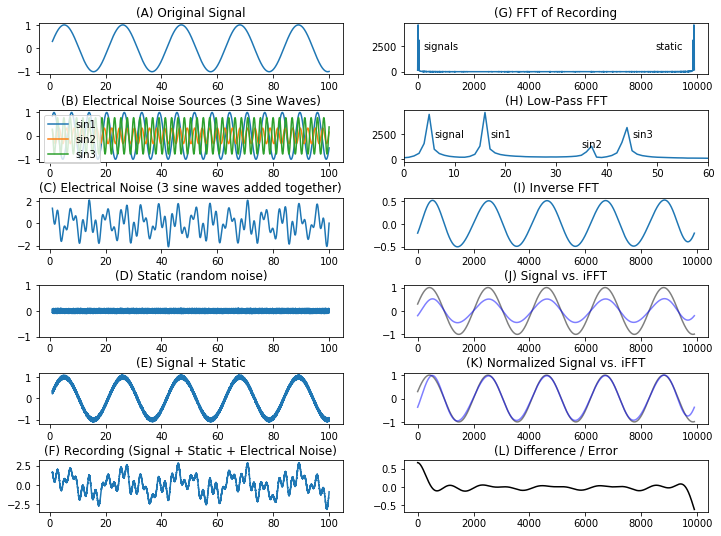

In [6]:
h,w=6,2
pylab.figure(figsize=(12,9))
pylab.subplots_adjust(hspace=.7)
    
pylab.subplot(h,w,1);pylab.title("(A) Original Signal")
pylab.plot(xs,signal)

pylab.subplot(h,w,3);pylab.title("(B) Electrical Noise Sources (3 Sine Waves)")
pylab.plot(xs,sin1,label="sin1")
pylab.plot(xs,sin2,label="sin2")
pylab.plot(xs,sin3,label="sin3")
pylab.legend()

pylab.subplot(h,w,5);pylab.title("(C) Electrical Noise (3 sine waves added together)")
pylab.plot(xs,noise)


pylab.subplot(h,w,7);pylab.title("(D) Static (random noise)")
pylab.plot(xs,static)
pylab.axis([None,None,-1,1])

pylab.subplot(h,w,9);pylab.title("(E) Signal + Static")
pylab.plot(xs,sigstat)

pylab.subplot(h,w,11);pylab.title("(F) Recording (Signal + Static + Electrical Noise)")
pylab.plot(xs,rawsignal)

fft=fftpack.fft(rawsignal)
pylab.subplot(h,w,2);pylab.title("(G) FFT of Recording")
pylab.plot(abs(fft))
pylab.text(200,3000,"signals",verticalalignment='top')
pylab.text(9500,3000,"static",verticalalignment='top',
            horizontalalignment='right')

pylab.subplot(h,w,4);pylab.title("(H) Low-Pass FFT")
pylab.plot(abs(fft))
pylab.text(17,3000,"sin1",verticalalignment='top',horizontalalignment='left')
pylab.text(37,2000,"sin2",verticalalignment='top',horizontalalignment='center')
pylab.text(45,3000,"sin3",verticalalignment='top',horizontalalignment='left')
pylab.text(6,3000,"signal",verticalalignment='top',horizontalalignment='left')
#pylab.axvspan(10,10000,fc='r',alpha='.5')
#pylab.axvspan(10,10000,alpha='.5')
pylab.axis([0,60,None,None])

pylab.subplot(h,w,6);pylab.title("(I) Inverse FFT")
pylab.plot(ibp)

pylab.subplot(h,w,8);pylab.title("(J) Signal vs. iFFT")
pylab.plot(signal,'k',label="signal",alpha=.5)
pylab.plot(ibp,'b',label="ifft",alpha=.5)

pylab.subplot(h,w,10);pylab.title("(K) Normalized Signal vs. iFFT")
pylab.plot(signal/max(signal),'k',label="signal",alpha=.5)
pylab.plot(ibp/max(ibp),'b',label="ifft",alpha=.5)

pylab.subplot(h,w,12);pylab.title("(L) Difference / Error")
pylab.plot(signal/max(signal)-ibp/max(ibp),'k')